In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import re

def iHRR_get_final_state(path, dt = 5):
    df = pd.read_csv(path)
    
    max_time = df['time'].max()
    recent_df = df[df['time'] >= max_time - dt]

    # Compute statistics
    mean_hrr = recent_df['ihrr'].mean()
    min_hrr = recent_df['ihrr'].min()
    max_hrr = recent_df['ihrr'].max()

    return mean_hrr, min_hrr, max_hrr

def get_case_iHRR(dataframe, filepath):
    # create array to hold results and iterater over all filtered runs
    results = np.empty((len(dataframe), 4))
    for i, row in enumerate(dataframe.itertuples(index=False)):
        # convert from row
        case = row.case
        u_in = row.u_in
        run = row.run
        
        # write u_in into u_in array
        results[i, 0] = float(u_in)
        # write mean, min and max into respective columns
        ihrr_dir = filepath / case / f"Uin_{u_in}_RUN{run:02d}/iHRR.csv"
        results[i, 1:] = iHRR_get_final_state(ihrr_dir)

    # sort by u_in
    indices = np.argsort(results[:,0])
    results = results[indices]
    return results

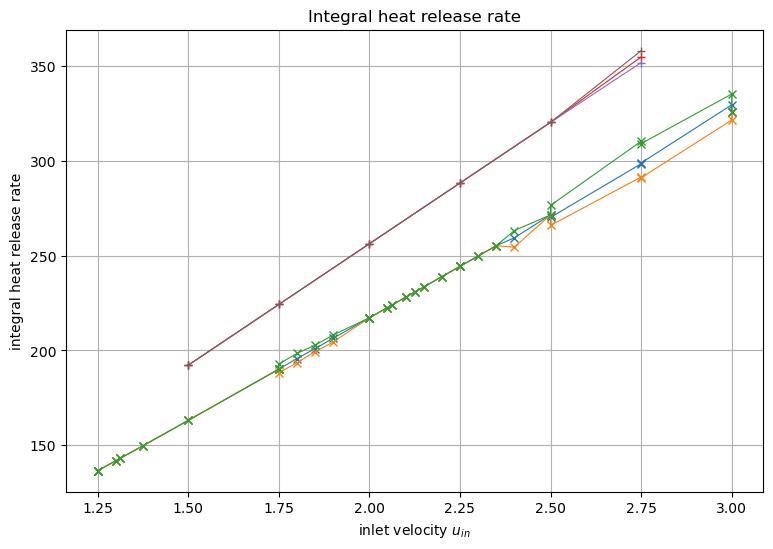

In [76]:
# Read list of cases/runs
username = os.getlogin()
filepath = Path(f"C:/Users/{username}/OneDrive - ETH Zurich/Semester 10/Master Thesis/Sim results")
runs_csv_dir = filepath / "caselist_post_proc.csv"
runs_df = pd.read_csv(runs_csv_dir, dtype={'u_in': str})
# filter runs for the ones needed here
last_runs_df = runs_df[runs_df['is_last'] == 'x']
base_phi06 = last_runs_df[last_runs_df['case'] == 'base_18.4k_phi_0.6']
base_phi075 = last_runs_df[last_runs_df['case'] == 'base_18.4k_phi_0.75']

results_pi06 = get_case_iHRR(base_phi06, filepath)
results_pi075 = get_case_iHRR(base_phi075, filepath)

plt.figure(figsize=(9, 6))
# Plot min and max versus u_in
plt.plot(results_pi06[:,0], results_pi06[:,1:], marker='x', linewidth=0.8)
plt.plot(results_pi075[:,0], results_pi075[:,1:], marker='+', linewidth=0.8)
plt.xlabel("inlet velocity $u_{in}$")
plt.ylabel("integral heat release rate")
plt.title("Integral heat release rate")
#plt.legend()
plt.grid(True)